In [19]:
import matplotlib.pyplot as plt
from datetime import datetime
import pyarrow.parquet as pq
import numpy as np

In [20]:
# Specify the path to your Parquet file
parquet_file = 'SnowStorageDATA.parquet'

# Read the Parquet file using PyArrow
table = pq.read_table(parquet_file)

# Convert the table to a NumPy array
data = table.to_pandas().to_numpy()

# Print the first few rows of the NumPy array for verification
print(data[:5])


[[2023 1 1 0 0.06 6e-05 '2023-01-01T00:00' 5.4 2023.0 1.0 1.0 0.0 0.0
  '2023-01-01T00:00' 25.6 7.1 '2023-01-01T00:00' 91]
 [2023 1 1 1 0.03 3e-05 '2023-01-01T01:00' 5.2 2023.0 1.0 1.0 1.0 0.0
  '2023-01-01T01:00' 24.1 6.7 '2023-01-01T01:00' 91]
 [2023 1 1 2 0.02 2e-05 '2023-01-01T02:00' 5.1 2023.0 1.0 1.0 2.0 0.0
  '2023-01-01T02:00' 24.8 6.9 '2023-01-01T02:00' 90]
 [2023 1 1 3 0.01 1e-05 '2023-01-01T03:00' 4.8 2023.0 1.0 1.0 3.0 0.0
  '2023-01-01T03:00' 23.8 6.6 '2023-01-01T03:00' 90]
 [2023 1 1 4 0.01 1e-05 '2023-01-01T04:00' 4.4 2023.0 1.0 1.0 4.0 0.0
  '2023-01-01T04:00' 23.4 6.5 '2023-01-01T04:00' 89]]


In [21]:
# Get '2023-04-01T00:00' format time data from the 7th column
time_column = data[:, 6]

# Convert the time_column to a string array if it's not already
time_column = time_column.astype(str)

# Convert find_index function to use NumPy
def find_index(array, value):
    return np.where(array == value)[0][0]

# Find the start and end indices
period_start_in = np.where(time_column == '2023-04-01T00:00')[0][0]
period_end_in = np.where(time_column == '2023-08-31T23:00')[0][0]
#period_start_in = find_index(time_column, '2023-04-01T00:00')
#period_end_in = find_index(time_column, '2023-08-31T23:00')

# Slice the data to include only the desired period
rdata = data[period_start_in:period_end_in + 1]

# Optionally, display the time column for verification
print(time_column)

# Optionally, display the sliced data for verification
print(rdata)

# Use your existing functions to print and process data
print(time_column)
print(rdata)

['2023-01-01T00:00' '2023-01-01T01:00' '2023-01-01T02:00' ...
 '2023-12-31T21:00' '2023-12-31T22:00' '2023-12-31T23:00']
[[2023 4 1 ... 6.0 '2023-04-01T00:00' 72]
 [2023 4 1 ... 6.1 '2023-04-01T01:00' 75]
 [2023 4 1 ... 6.5 '2023-04-01T02:00' 65]
 ...
 [2023 8 31 ... 3.8 '2023-08-31T21:00' 91]
 [2023 8 31 ... 3.6 '2023-08-31T22:00' 91]
 [2023 8 31 ... 2.8 '2023-08-31T23:00' 93]]
['2023-01-01T00:00' '2023-01-01T01:00' '2023-01-01T02:00' ...
 '2023-12-31T21:00' '2023-12-31T22:00' '2023-12-31T23:00']
[[2023 4 1 ... 6.0 '2023-04-01T00:00' 72]
 [2023 4 1 ... 6.1 '2023-04-01T01:00' 75]
 [2023 4 1 ... 6.5 '2023-04-01T02:00' 65]
 ...
 [2023 8 31 ... 3.8 '2023-08-31T21:00' 91]
 [2023 8 31 ... 3.6 '2023-08-31T22:00' 91]
 [2023 8 31 ... 2.8 '2023-08-31T23:00' 93]]


In [22]:
def printNP(arr, name=None):
    """
    Prints a NumPy array in the usual format with optional name, length, and dtype.

    Parameters:
        arr (numpy.ndarray): The NumPy array to print.
        name (str): Optional name to include in the output.
    ---
    # Example usage
    ```
    air_vel_vec = np.array([0.2, 0.1, -0.1, 15.0, 16.9, 16.5, 15.8])
    printNP(air_vel_vec, name="Air velocity (with cond)")
    ```
    """
    array_str = np.array2string(arr, separator=' ', threshold=6)
    length = arr.shape[0]
    dtype = arr.dtype
    if name:
        print(f"{array_str}\nName: {name}, Length: {length}, dtype: {dtype}")
    else:
        print(f"{array_str}\nLength: {length}, dtype: {dtype}")

In [23]:
# Get air temperature data and assign it to a vector
air_temp_vec = rdata[:, 7].astype(float)
#print(air_temp_vec)
#print(type(air_temp_vec))
printNP(air_temp_vec)
#printVec(air_temp_vec, column_name="Air temperature (Celsius)")

# Get air velocity data and assign it to a vector
air_vel_vec = rdata[:, 15].astype(float)
#printVec(air_vel_vec, column_name="Air velocity (m/s)")

# Extract the amount of precipitation column from the data
prec_vec = rdata[:, 5].astype(float)
#printVec(prec_vec, column_name="Precipitation (m/h)")

# Extract the global solar irradiance (W/m2) column from the data
glob_solir_vec = rdata[:, 12].astype(float)
#printVec(glob_solir_vec, column_name="Global solar irradiance (W/m2)")


[ 0.2  0.1 -0.1 ... 16.9 16.5 15.8]
Length: 3672, dtype: float64


In [24]:
# Heat transfer coefficient at the external surface
h = 22.7 # W/(m^2K)
# Solar light absorptivity
alpha = 0.8
# Correction factor for horizontal surface
T_cor_fact = 4.0 # °C

T_sol_air_vec = alpha * glob_solir_vec / h + air_temp_vec - T_cor_fact
printNP(T_sol_air_vec)

[-3.8 -3.9 -4.1 ... 12.9 12.5 11.8]
Length: 3672, dtype: float64


In [25]:
# Insulation layer thickness
d_ins = 0.1 # m
# Thermal conductivity for the insulating material
lam_i = 0.32 # W/(mK)
# The surface area (m2) of the pile of snow
A_surf = 210.0 # m^2

Q_surf_vec = A_surf * lam_i / d_ins * (T_sol_air_vec - 0.0) # W
printNP(Q_surf_vec)

[-2553.6 -2620.8 -2755.2 ...  8668.8  8400.   7929.6]
Length: 3672, dtype: float64


In [26]:
# Constants
L_f = 333.4E03  # J/kg; latent heat of fusion
rho_snow = 411.0  # kg/m^3; density of snow
rho_water = 1000.0  # kg/m^3
c_water = 4.19E03  # J/(kg*K)
A_surf = 210.0  # m^2
d_ins = 0.1  # m; thickness of insulation layer

# Assuming Q_surf_vec, air_temp_vec, prec_vec, glob_solir_vec, air_vel_vec, rdata are all NumPy arrays

# The rate of melted snow from surface melt
f_srf_melt_vec = Q_surf_vec / (L_f * rho_snow)
printNP(f_srf_melt_vec, name="Surface melt rate (m^3/s)")

# Hourly rate of melted snow from surface melt
hrly_srf_total_vec = f_srf_melt_vec * 3600.0
printNP(hrly_srf_total_vec, name="Hourly rate of surface melt (m^3/h)")

# Initialize q_rain_vec with zeros
q_rain_vec = np.zeros(len(air_temp_vec))

# Update q_rain_vec where air_temp is greater than 0.0
q_rain_vec[air_temp_vec > 0.0] = prec_vec[air_temp_vec > 0.0] * rho_water * c_water * air_temp_vec[air_temp_vec > 0.0] / 3600.0
printNP(q_rain_vec, name="Hourly melt rate from surface (m^3/h)")

# Hourly rain volume
v_rain_vec = prec_vec * A_surf * rho_water * c_water * air_temp_vec / (L_f * rho_snow)
printNP(v_rain_vec, name="Hourly melt rate from rain (m^3/h)")

# Calculate the surface melt rate where the temperature is greater than 0
SMR_temp_vec = np.where(air_temp_vec > 0.0, hrly_srf_total_vec * rho_snow / A_surf, 0.0)
printNP(SMR_temp_vec, name="SMR due to T")

# Surface melt rate due to rain
SMR_rain_vec = v_rain_vec * rho_snow / A_surf
printNP(SMR_rain_vec, name="SMR due to rain (m^3/h)")

# Combined total SMR
SMR_total_vec = SMR_temp_vec + SMR_rain_vec
printNP(SMR_total_vec, name="Combined total SMR (m^3/h)")

# Cumulative sum of the SMR with rain together with temperature
SMR_tot_rain_cs_vec = np.cumsum(SMR_total_vec)
printNP(SMR_tot_rain_cs_vec, name="Rain and T cumulative (m^3/h)")

# Empirical 1 calculation
emp1_SMR_vec = -0.09 + 0.00014*glob_solir_vec + 0.0575*air_temp_vec + 0.0012*air_temp_vec*air_vel_vec - 0.18*air_temp_vec*d_ins
printNP(emp1_SMR_vec, name="Empirical 1")

[-1.86356889e-05 -1.91261018e-05 -2.01069275e-05 ...  6.32632598e-05
  6.13016083e-05  5.78687182e-05]
Name: Surface melt rate (m^3/s), Length: 3672, dtype: float64
[-0.06708848 -0.06885397 -0.07238494 ...  0.22774774  0.22068579
  0.20832739]
Name: Hourly rate of surface melt (m^3/h), Length: 3672, dtype: float64
[0.         0.00116389 0.         ... 0.         0.19204167 0.18389444]
Name: Hourly melt rate from surface (m^3/h), Length: 3672, dtype: float64
[ 0.00000000e+00  6.42134347e-06 -6.42134347e-06 ...  0.00000000e+00
  1.05952167e-03  1.01457227e-03]
Name: Hourly melt rate from rain (m^3/h), Length: 3672, dtype: float64
[-0.13130174 -0.13475705  0.         ...  0.44573485  0.43191362
  0.40772645]
Name: SMR due to T, Length: 3672, dtype: float64
[ 0.00000000e+00  1.25674865e-05 -1.25674865e-05 ...  0.00000000e+00
  2.07363527e-03  1.98566287e-03]
Name: SMR due to rain (m^3/h), Length: 3672, dtype: float64
[-1.31301740e-01 -1.34744481e-01 -1.25674865e-05 ...  4.45734853e-01
  4.

In [27]:
def Psat_WV(T_K):
    """
    Water vapour saturation pressure
    W. Wagner and A. Pruß:" The IAPWS Formulation 1995 for the
    Thermodynamic Properties of Ordinary Water Substance for General and Scientific Use ",
    Journal of Physical and Chemical Reference Data, June 2002 ,Volume 31, Issue 2, pp.
    387535)

    Returns Saturation vapor pressure (hPa)
    ---
    ```
    # Example usage:
    T_K = np.array([300.0, 310.0, 320.0])  # Replace with your temperature values in Kelvin
    Psat_values = Psat_WV(T_K)
    print(Psat_values)
    ```
    """
    Tc = 647.096  # Critical temperature, K
    Pc = 220640   # Critical pressure, hPa
    
    C1 = -7.85951783
    C2 = 1.84408259
    C3 = -11.7866497
    C4 = 22.6807411
    C5 = -15.9618719
    C6 = 1.80122502
    
    teta = 1 - T_K / Tc
    
    x = Tc / T_K * (C1 * teta + C2 * teta ** 1.5 + C3 * teta ** 3 + C4 * teta ** 3.5 + C5 * teta ** 4 + C6 * teta ** 7.5)
    
    x = np.exp(x) * Pc
    
    return x

In [28]:
# Water vapour saturation pressure (hPa)
Psat_vec = Psat_WV(air_temp_vec + 273.15)/10.0
printNP(Psat_vec, name="Water vapour saturation pressure (hPa)")

[0.6201519  0.61566799 0.60678632 ... 1.92597977 1.87763195 1.79558115]
Name: Water vapour saturation pressure (hPa), Length: 3672, dtype: float64


In [29]:
# Extract the amount of RH precipitation column from the data
RH_perc_vec = np.array([row[17] for row in rdata], dtype=float)
printNP(RH_perc_vec, name="Relative Humidity Precipitation (m/h)")

# Water steam pressure
Pw_vec = Psat_vec * RH_perc_vec / 100.0  # kPa
printNP(Pw_vec, name="Water steam pressure (kPa)")

# Absolute humidity
w_vec = 2.16679 * Pw_vec * 1000 / (273.15 + air_temp_vec)  # kPa; 1000 to convert to kPa
printNP(w_vec, name="Absolute humidity (kPa)")

# Surface melt rate from insulation thickness, air velocity, light intensity, air temperature, and air humidity
emp2_SMR_vec = -0.97 - 0.097 * (d_ins * 100) + 0.164 * air_vel_vec + 0.00175 * glob_solir_vec + 0.102 * air_temp_vec + 0.192 * w_vec  # kg/m2/h
printNP(emp2_SMR_vec, name="Empirical 2")

# Create a vector for emp1_SMR with condition ('wc')
emp1_SMR_wc_vec = np.where((emp1_SMR_vec < 0) | (air_temp_vec < 0), 0.0, emp1_SMR_vec)  # 'wc' - with condition
printNP(emp1_SMR_wc_vec, name="Empirical 1 (pos. cond)")

# Create a vector for emp2_SMR_vec with condition ('cond')
emp2_SMR_wc_vec = np.where((emp2_SMR_vec < 0) | (air_temp_vec < 0), 0.0, emp2_SMR_vec)  # 'wc' - with condition
printNP(emp2_SMR_wc_vec, name="Empirical 2 (pos. cond)")

# Cumulative sum of pos. empirical methods
emp1_SMR_wc_cs_vec = np.cumsum(emp1_SMR_wc_vec)  # 'cs' - Cumulative Sum
printNP(emp1_SMR_wc_cs_vec, name="Cumulative sum - Emp 1")
emp2_SMR_wc_cs_vec = np.cumsum(emp2_SMR_wc_vec)  # 'cs' - Cumulative Sum
printNP(emp2_SMR_wc_cs_vec, name="Cumulative sum - Emp 2")

[72. 75. 65. ... 91. 91. 93.]
Name: Relative Humidity Precipitation (m/h), Length: 3672, dtype: float64
[0.44650937 0.46175099 0.39441111 ... 1.7526416  1.70864508 1.66989047]
Name: Water steam pressure (kPa), Length: 3672, dtype: float64
[ 3.53938919  3.66154594  3.12985184 ... 13.09293667 12.78189218
 12.52224252]
Name: Absolute humidity (kPa), Length: 3672, dtype: float64
[-0.25603727 -0.22638318 -0.28326845 ...  2.92084384  2.7875233
  2.53507056]
Name: Empirical 2, Length: 3672, dtype: float64
[0.       0.       0.       ... 0.654614 0.63303  0.587188]
Name: Empirical 1 (pos. cond), Length: 3672, dtype: float64
[0.         0.         0.         ... 2.92084384 2.7875233  2.53507056]
Name: Empirical 2 (pos. cond), Length: 3672, dtype: float64
[   0.           0.           0.        ... 2214.3381016 2214.9711316
 2215.5583196]
Name: Cumulative sum - Emp 1, Length: 3672, dtype: float64
[   0.            0.            0.         ... 8187.66929399 8190.45681729
 8192.99188785]
Name: Cum

In [30]:
# Specify the path to your Parquet file
parquet_file = 'TsiTsoDATA.parquet'

# Read the Parquet file using PyArrow
table = pq.read_table(parquet_file)

# Convert the table to a NumPy array
data2 = table.to_pandas().to_numpy()

print(data2)

[[-1.21154676e-35 -4.22381009e-01]
 [-1.34912357e-29 -7.15958782e-01]
 [-4.32568671e-26 -9.60884914e-01]
 ...
 [ 6.61014848e-01  1.47543976e+01]
 [ 6.60818814e-01  1.45970134e+01]
 [ 6.60621632e-01  1.44487485e+01]]


In [31]:
# If you want to keep specific columns, you can use the appropriate slicing in NumPy
Tsi_vec_raw = data2[:, 0]  # Exclude the first row and get the first column
Tsi_vec = Tsi_vec_raw.astype(float)
printNP(Tsi_vec, name="Tsi (Celsius)")

Tso_vec_raw = data2[:, 1]  # Exclude the first row and get the second column
Tso_vec = Tso_vec_raw.astype(float)
printNP(Tso_vec, name="Tso (Celsius)")

[-1.21154676e-35 -1.34912357e-29 -4.32568671e-26 ...  6.61014848e-01
  6.60818814e-01  6.60621632e-01]
Name: Tsi (Celsius), Length: 3672, dtype: float64
[-0.42238101 -0.71595878 -0.96088491 ... 14.75439756 14.59701345
 14.44874852]
Name: Tso (Celsius), Length: 3672, dtype: float64


In [32]:
# Assuming air_vel_vec is a NumPy array
ho_vec = np.where(air_vel_vec <= 5.0, 6.0 + 4.0 * air_vel_vec, 7.41 * (air_vel_vec ** 0.78))
printNP(ho_vec, name="# Air velocity (with cond)")

# Heat transfer coefficient at the internal surface:
h_i = 99.75  # W/m^2*K

# Heat flux in
qi_vec = (Tsi_vec - 0.0) * h_i  # W/m^2
printNP(qi_vec, name="Heat flux in (W/m^2)")

# Heat flux out
qo_vec = (T_sol_air_vec - Tso_vec) * ho_vec  # W/m^2
printNP(qo_vec, name="Heat flux out (W/m^2)")

# Speed of phase change
v_pc_vec = qi_vec / (L_f * rho_snow)  # m^3/(m^2*s)
printNP(v_pc_vec, name="Speed of phase change (m^3/(m^2*s))")

# Hourly speed of phase change
v_pc_hourly_vec = v_pc_vec * 3600  # m/h
printNP(v_pc_hourly_vec, name="Hourly speed of phase change (m^3/(m^2*h))")

# Calculate hourly melt rate from solar heat flux
hfmr_vec = np.where(air_temp_vec > 0, v_pc_hourly_vec * rho_snow, 0.0)
printNP(hfmr_vec, name="Hourly melt rate from solar heat flux")

# Cumulative hourly melt rate from solar heat flux
hfmr_cumsum_vec = np.cumsum(hfmr_vec)
printNP(hfmr_cumsum_vec, name="Cumulative hourly melt rate from solar heat flux")

# Heat flux from rain and sun
rain_solar_hf_vec = q_rain_vec + qo_vec  # W/m^2
printNP(rain_solar_hf_vec, name="Heat flux from rain and sun (W/m^2)")

# Heat flux from wind, solar, and rain
wind_solar_rain_vec = rain_solar_hf_vec / (T_sol_air_vec - Tso_vec)
printNP(wind_solar_rain_vec, name="Heat flux from wind, solar and rain (W/m^2)")

[29.97617278 30.36515339 31.90734191 ... 21.2        20.4
 17.2       ]
Name: # Air velocity (with cond), Length: 3672, dtype: float64
[-1.20851789e-33 -1.34575076e-27 -4.31487249e-24 ...  6.59362311e+01
  6.59166767e+01  6.58970077e+01]
Name: Heat flux in (W/m^2), Length: 3672, dtype: float64
[-101.24809044  -96.68389997 -100.16081835 ...  -39.31322833  -42.77907428
  -45.55847448]
Name: Heat flux out (W/m^2), Length: 3672, dtype: float64
[-8.81953456e-42 -9.82103403e-36 -3.14891218e-32 ...  4.81190120e-07
  4.81047416e-07  4.80903876e-07]
Name: Speed of phase change (m^3/(m^2*s)), Length: 3672, dtype: float64
[-3.17503244e-38 -3.53557225e-32 -1.13360839e-28 ...  1.73228443e-03
  1.73177070e-03  1.73125395e-03]
Name: Hourly speed of phase change (m^3/(m^2*h)), Length: 3672, dtype: float64
[-1.30493833e-35 -1.45312019e-29  0.00000000e+00 ...  7.11968902e-01
  7.11757757e-01  7.11545375e-01]
Name: Hourly melt rate from solar heat flux, Length: 3672, dtype: float64
[-1.30493833e-35 -1.45

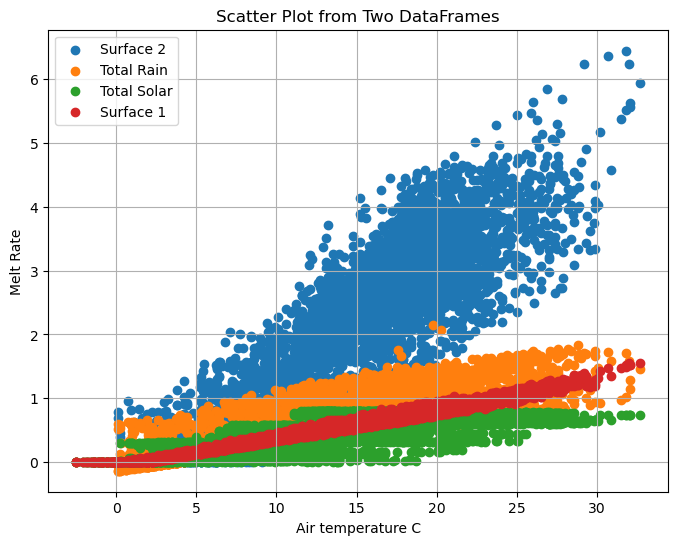

In [33]:
# Generate the scatter plot
plt.figure(figsize=(8, 6))

plt.scatter(air_temp_vec, emp2_SMR_wc_vec, label='Surface 2')
plt.scatter(air_temp_vec, SMR_total_vec, label='Total Rain')
plt.scatter(air_temp_vec, hfmr_vec, label='Total Solar')
plt.scatter(air_temp_vec, emp1_SMR_wc_vec, label='Surface 1')

plt.title('Scatter Plot from Two DataFrames')
plt.xlabel('Air temperature C')
plt.ylabel('Melt Rate')
plt.legend()
plt.grid()
plt.show()

In [34]:
time_object = rdata[:, 6]
printNP(time_object)
# Convert the datetime strings to datetime objects and then to Unix timestamps
time_intvec = np.array([int(datetime.strptime(dt, 
                '%Y-%m-%dT%H:%M').timestamp()) for dt in time_object])

printNP(time_intvec)

['2023-04-01T00:00' '2023-04-01T01:00' '2023-04-01T02:00' ...
 '2023-08-31T21:00' '2023-08-31T22:00' '2023-08-31T23:00']
Length: 3672, dtype: object
[1680296400 1680300000 1680303600 ... 1693504800 1693508400 1693512000]
Length: 3672, dtype: int64


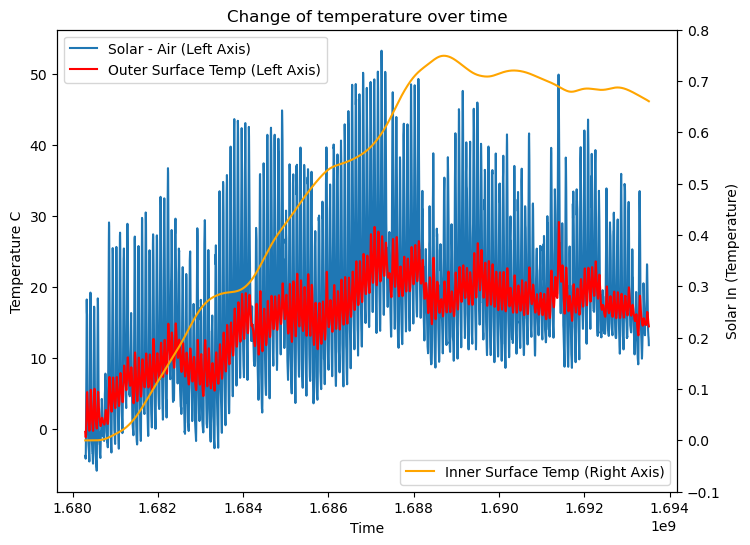

In [35]:
# Generate the scatter plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot df_T_sol_air and df_Tso on the primary y-axis
ax1.plot(time_intvec, T_sol_air_vec, label='Solar - Air (Left Axis)')
ax1.plot(time_intvec, Tso_vec, color = 'red', label='Outer Surface Temp (Left Axis)')

ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature C')
ax1.set_title('Change of temperature over time')
ax1.legend(loc='upper left')

# Create a secondary y-axis and plot df_Tsi on it
ax2 = ax1.twinx()
ax2.plot(time_intvec, Tsi_vec, label='Inner Surface Temp (Right Axis)', color='orange')

# Set the y-axis range for the secondary y-axis
ax2.set_ylim(-0.1, 0.8)
ax2.set_ylabel('Solar In (Temperature)')
ax2.legend(loc='lower right')
plt.show()

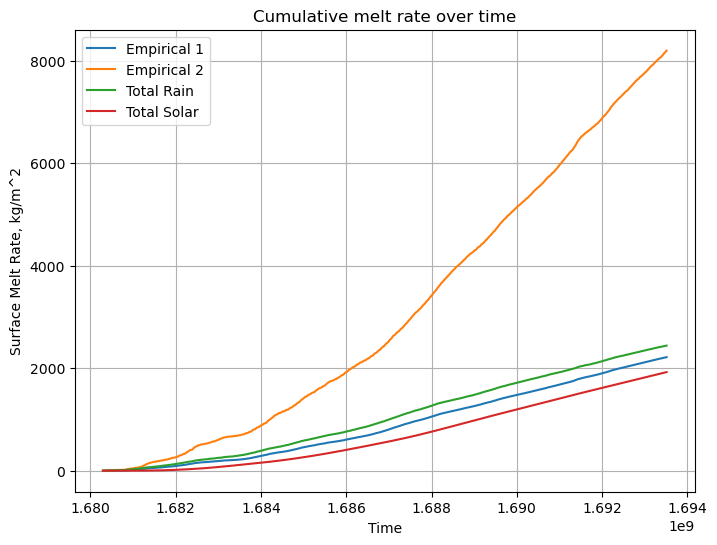

In [36]:
# Generate the scatter plot
plt.figure(figsize=(8, 6))

plt.plot(time_intvec, emp1_SMR_wc_cs_vec, label='Empirical 1')
plt.plot(time_intvec, emp2_SMR_wc_cs_vec, label='Empirical 2')
plt.plot(time_intvec, SMR_tot_rain_cs_vec, label='Total Rain')
plt.plot(time_intvec, hfmr_cumsum_vec, label='Total Solar')

plt.title('Cumulative melt rate over time')
plt.xlabel('Time')
plt.ylabel('Surface Melt Rate, kg/m^2')
plt.legend()
plt.grid()
plt.show()

In [37]:
# Define the time frame
smol_time_col = rdata[:, 6]

start_time = '2023-06-08T00:00'
end_time = '2023-06-13T00:00'

# Filter the DataFrame
time_mask = (smol_time_col >= start_time) & (smol_time_col <= end_time)
print(len(time_mask))
# Print the values where time_mask is True
filtered_time_obj = smol_time_col[time_mask]
print(filtered_time_obj)

filt_timeinter_intvec = np.array([int(datetime.strptime(dt, 
                '%Y-%m-%dT%H:%M').timestamp()) for dt in filtered_time_obj])
printNP(filt_timeinter_intvec)

3672
['2023-06-08T00:00' '2023-06-08T01:00' '2023-06-08T02:00'
 '2023-06-08T03:00' '2023-06-08T04:00' '2023-06-08T05:00'
 '2023-06-08T06:00' '2023-06-08T07:00' '2023-06-08T08:00'
 '2023-06-08T09:00' '2023-06-08T10:00' '2023-06-08T11:00'
 '2023-06-08T12:00' '2023-06-08T13:00' '2023-06-08T14:00'
 '2023-06-08T15:00' '2023-06-08T16:00' '2023-06-08T17:00'
 '2023-06-08T18:00' '2023-06-08T19:00' '2023-06-08T20:00'
 '2023-06-08T21:00' '2023-06-08T22:00' '2023-06-08T23:00'
 '2023-06-09T00:00' '2023-06-09T01:00' '2023-06-09T02:00'
 '2023-06-09T03:00' '2023-06-09T04:00' '2023-06-09T05:00'
 '2023-06-09T06:00' '2023-06-09T07:00' '2023-06-09T08:00'
 '2023-06-09T09:00' '2023-06-09T10:00' '2023-06-09T11:00'
 '2023-06-09T12:00' '2023-06-09T13:00' '2023-06-09T14:00'
 '2023-06-09T15:00' '2023-06-09T16:00' '2023-06-09T17:00'
 '2023-06-09T18:00' '2023-06-09T19:00' '2023-06-09T20:00'
 '2023-06-09T21:00' '2023-06-09T22:00' '2023-06-09T23:00'
 '2023-06-10T00:00' '2023-06-10T01:00' '2023-06-10T02:00'
 '2023-06

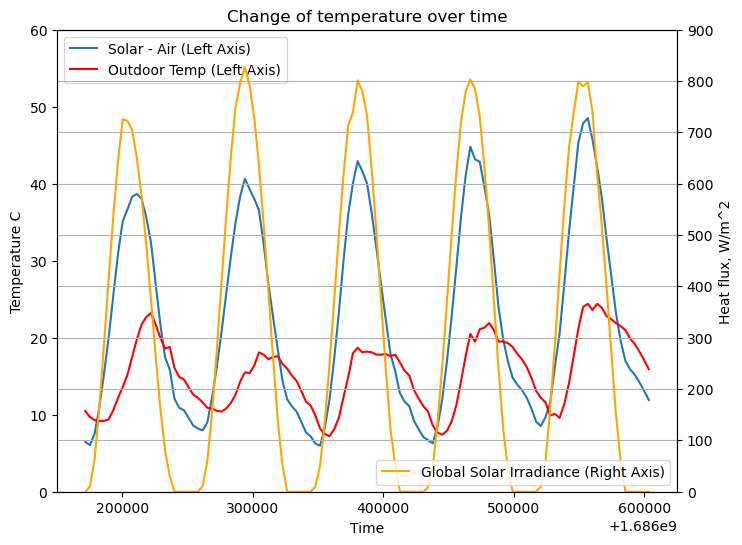

In [38]:
# Generate the scatter plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot df_T_sol_air and df_Tso on the primary y-axis
ax1.plot(filt_timeinter_intvec, T_sol_air_vec[time_mask], label='Solar - Air (Left Axis)')
ax1.plot(filt_timeinter_intvec, air_temp_vec[time_mask], color = 'red', label='Outdoor Temp (Left Axis)')

ax1.set_ylim(0.0, 60)
ax1.set_xlabel('Time')
ax1.set_ylabel('Temperature C')
ax1.set_title('Change of temperature over time')
ax1.legend(loc='upper left')

# Create a secondary y-axis and plot df_Tsi on it
ax2 = ax1.twinx()
ax2.plot(filt_timeinter_intvec, glob_solir_vec[time_mask], label='Global Solar Irradiance (Right Axis)', color='orange')

# Set the y-axis range for the secondary y-axis
ax2.set_ylim(0.0, 900)
ax2.set_ylabel('Heat flux, W/m^2')
ax2.legend(loc='lower right')
plt.grid()
plt.show()

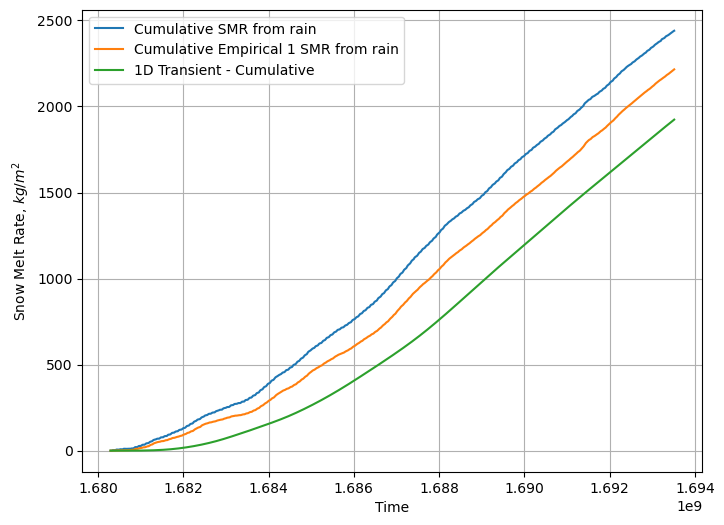

In [39]:
fig, ax = plt.subplots(figsize = (8, 6) )

ax.plot(time_intvec, SMR_tot_rain_cs_vec, label='Cumulative SMR from rain')
ax.plot(time_intvec, emp1_SMR_wc_cs_vec, label='Cumulative Empirical 1 SMR from rain')
ax.plot(time_intvec, hfmr_cumsum_vec, label='1D Transient - Cumulative')

plt.xlabel('Time')
plt.ylabel('Snow Melt Rate, $kg/m^2$')
plt.legend()
plt.grid()
plt.show()